## Importing libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Image

## Importing dataset

In [2]:
df=pd.read_csv('../input/paddy-disease-classification/train.csv')
df.head(10)

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45
5,102353.jpg,bacterial_leaf_blight,ADT45,45
6,102848.jpg,bacterial_leaf_blight,ADT45,45
7,103051.jpg,bacterial_leaf_blight,ADT45,45
8,103702.jpg,bacterial_leaf_blight,ADT45,45
9,103920.jpg,bacterial_leaf_blight,ADT45,45


In [3]:
df.shape

(10407, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  10407 non-null  object
 1   label     10407 non-null  object
 2   variety   10407 non-null  object
 3   age       10407 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 325.3+ KB


normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: label, dtype: int64


Text(0.5, 1.0, 'The Distribution of labels')

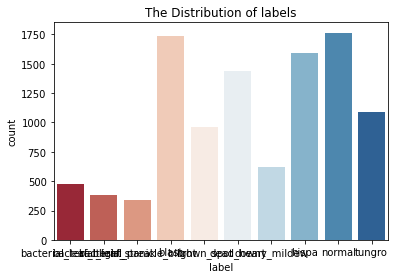

In [5]:
print(df['label'].value_counts())
sns.countplot(data = df, x = "label", palette = "RdBu")
plt.title("The Distribution of labels")

70    3077
60    1660
50    1066
75     866
65     774
55     563
72     552
45     505
67     415
68     253
80     225
57     213
47     112
77      42
73      38
66      36
62       5
82       5
Name: age, dtype: int64


Text(0.5, 1.0, 'The Distribution of age')

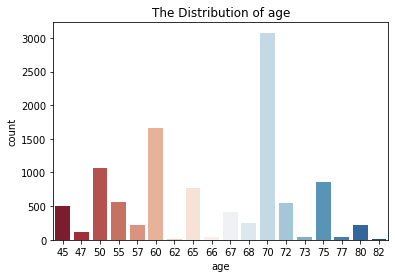

In [6]:
print(df['age'].value_counts())
sns.countplot(data = df, x = "age", palette = "RdBu")
plt.title("The Distribution of age")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


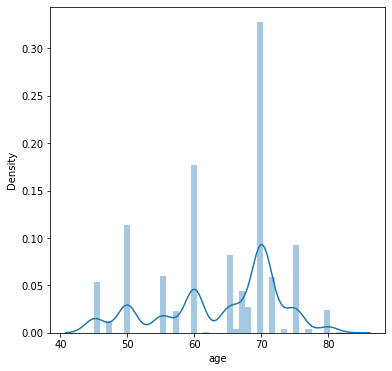

In [7]:
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.show()

In [8]:
# Calculate the number of classes 
num_class = len(df['label'].unique())
display("Number of classes:",num_class)

'Number of classes:'

10

In [9]:
# cheack the missing value of the data
df.isna().sum()

image_id    0
label       0
variety     0
age         0
dtype: int64

### We have not missing value in data

In [10]:
# calculate the describe for the age 
df.describe().style.background_gradient(cmap = "magma")

,age
count,10407.000000
mean,64.043624
std,8.958830
min,45.000000
25%,60.000000
50%,67.000000
75%,70.000000
max,82.000000


"We also see that 50% of the plants' age is 64 days, and the 75% falls under 75%, and the oldest age of plants is 82 and the least is 45 days old."

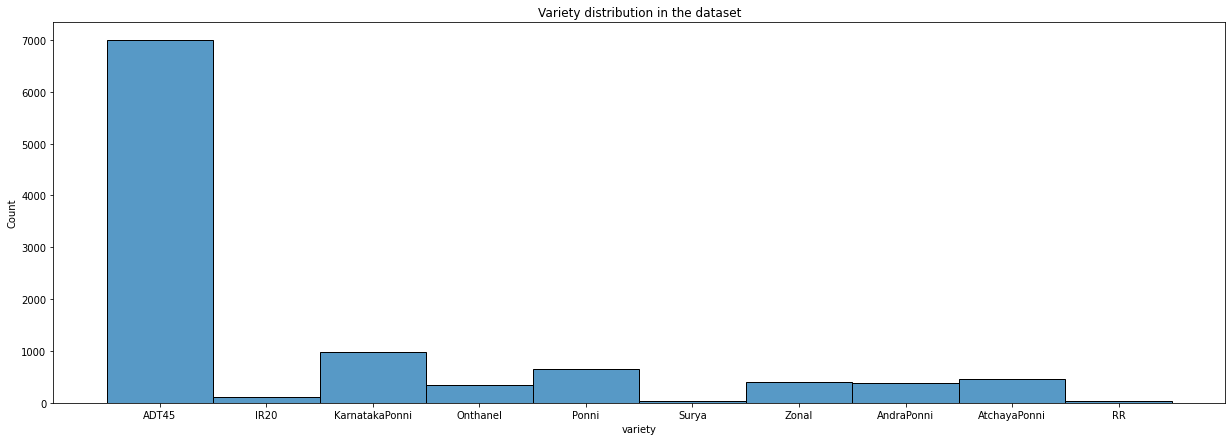

In [11]:
fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.histplot(df,x='variety',ax=axes)
plt.title('Variety distribution in the dataset')
plt.show()

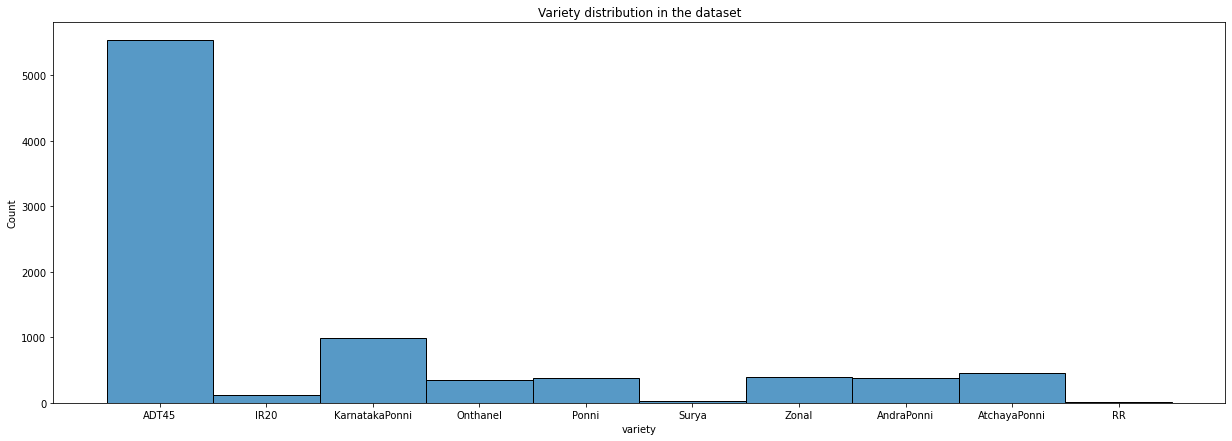

In [12]:
fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.histplot(df[df['label']!='normal'],x='variety',ax=axes)
plt.title('Variety distribution in the dataset')
plt.show()

In [13]:
images = ['../input/paddy-disease-classification/train_images/hispa/106590.jpg',\
          '../input/paddy-disease-classification/train_images/tungro/109629.jpg',\
          '../input/paddy-disease-classification/train_images/bacterial_leaf_blight/109372.jpg',\
          '../input/paddy-disease-classification/train_images/downy_mildew/102350.jpg',\
          '../input/paddy-disease-classification/train_images/blast/110243.jpg',\
          '../input/paddy-disease-classification/train_images/bacterial_leaf_streak/101104.jpg',\
          '../input/paddy-disease-classification/train_images/normal/109760.jpg',\
          '../input/paddy-disease-classification/train_images/brown_spot/104675.jpg',\
          '../input/paddy-disease-classification/train_images/dead_heart/105159.jpg',\
          '../input/paddy-disease-classification/train_images/bacterial_panicle_blight/101351.jpg',\
         ]
diseases = ['hispa','tungro','bacterial_leaf_blight','downy_mildew','blast','bacterial_leaf_streak',\
           'normal','brown_spot','dead_heart','bacterial_panicle_blight']
diseases = [disease +' disease' for disease in diseases]

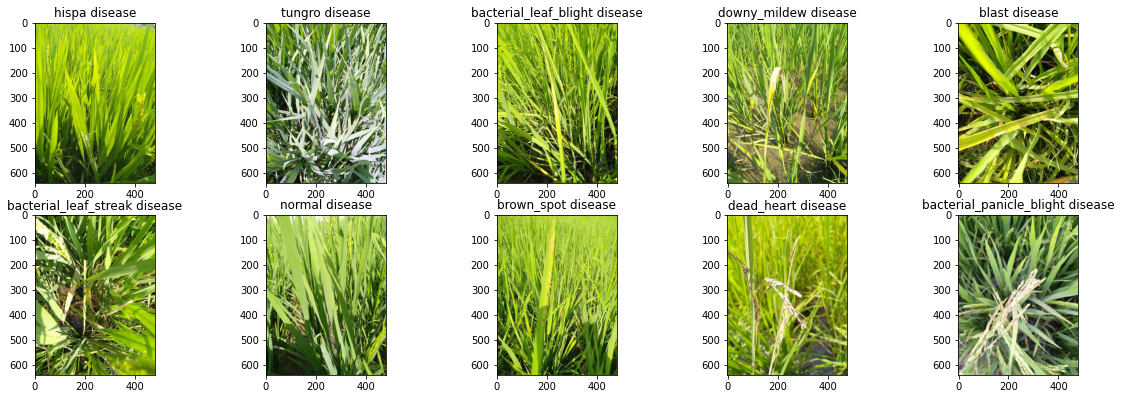

In [14]:
plt.figure(figsize=(20,10))
columns = 5
for i, image_loc in enumerate(images):
    plt.subplot(len(images)//columns + 1, columns, i + 1)
    image=plt.imread(image_loc)
    plt.title(diseases[i])
    plt.imshow(image)

# Using the Deep Learning Model

# Make Data Augmentation
`Data Augmentation` It is the technique used to avoid over-processing and also to improve accuracy in increasing and diversifying existing samples.

In [15]:
import tensorflow
from tensorflow.keras.models import Sequential,load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout,MaxPool2D, LSTM, GRU, BatchNormalization,Input
from tensorflow.keras.layers import Embedding, Concatenate, Reshape
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.layers import ELU

from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
import tensorflow.keras.layers as tensorflowl
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [16]:
img_rows, img_cols = 256, 256
batch_size = 64
epoch = 10

In [17]:
# we can make change in the parameter to get best result 
aug_gens = ImageDataGenerator(   rescale=1.0/255.0,
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False,  
    validation_split=0.1,
    rotation_range=10,
    shear_range=0.25,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,)

In [18]:
# train data set
train_loc = '../input/paddy-disease-classification/train_images/'
train_data = aug_gens.flow_from_directory(
    train_loc,
    subset="training",
    seed=2,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode="categorical")

Found 9371 images belonging to 10 classes.


In [19]:
# validation data set
valid_data = aug_gens.flow_from_directory(
    train_loc,
    subset="validation",
    seed=2,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode="categorical")

Found 1036 images belonging to 10 classes.


In [20]:
# Read test dataset
test_loc = '../input/paddy-disease-classification/test_images'
test_data = ImageDataGenerator(rescale=1.0/255).flow_from_directory(    
    directory=test_loc,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    classes=['.'],
    shuffle=False,
)

Found 3469 images belonging to 1 classes.


# Bulding the Model

In [21]:
Rel = tensorflow.keras.layers.LeakyReLU(alpha=0.01)

In [22]:
input_layer = Input((img_rows,img_cols,3))
conv2d_1_1 = Conv2D(filters=32, kernel_size=[3,3],strides =(1,1), activation='relu', padding="same", name ="conv2d_branch1")(input_layer)
maxpool = MaxPool2D(pool_size=[2,2])(conv2d_1_1)

conv2d_1_2 = Conv2D(filters=32, kernel_size=[3,3], activation='relu', padding="same")(maxpool)
maxpool = MaxPool2D(pool_size=[2,2])(conv2d_1_2)

conv2d_1_3 = Conv2D(filters=64, kernel_size=[3,3], activation='relu', padding="same")(maxpool)
maxpool = MaxPool2D(pool_size=[2,2])(conv2d_1_3)

conv2d_1_4 = Conv2D(filters=128, kernel_size=[3,3], activation='relu', padding="same")(maxpool)
maxpool = MaxPool2D(pool_size=[2,2])(conv2d_1_4)

flatten = Flatten()(maxpool)
dense_1 = Dense(1024, activation='swish')(flatten)

dense_2 = Dense(128, activation='swish')(dense_1)

output_dense = Dense(num_class, activation="softmax")(dense_2)

model = Model(inputs=[input_layer], outputs=[output_dense])

2022-06-30 16:28:38.895333: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-30 16:28:38.986388: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-30 16:28:38.987192: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-30 16:28:38.988298: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

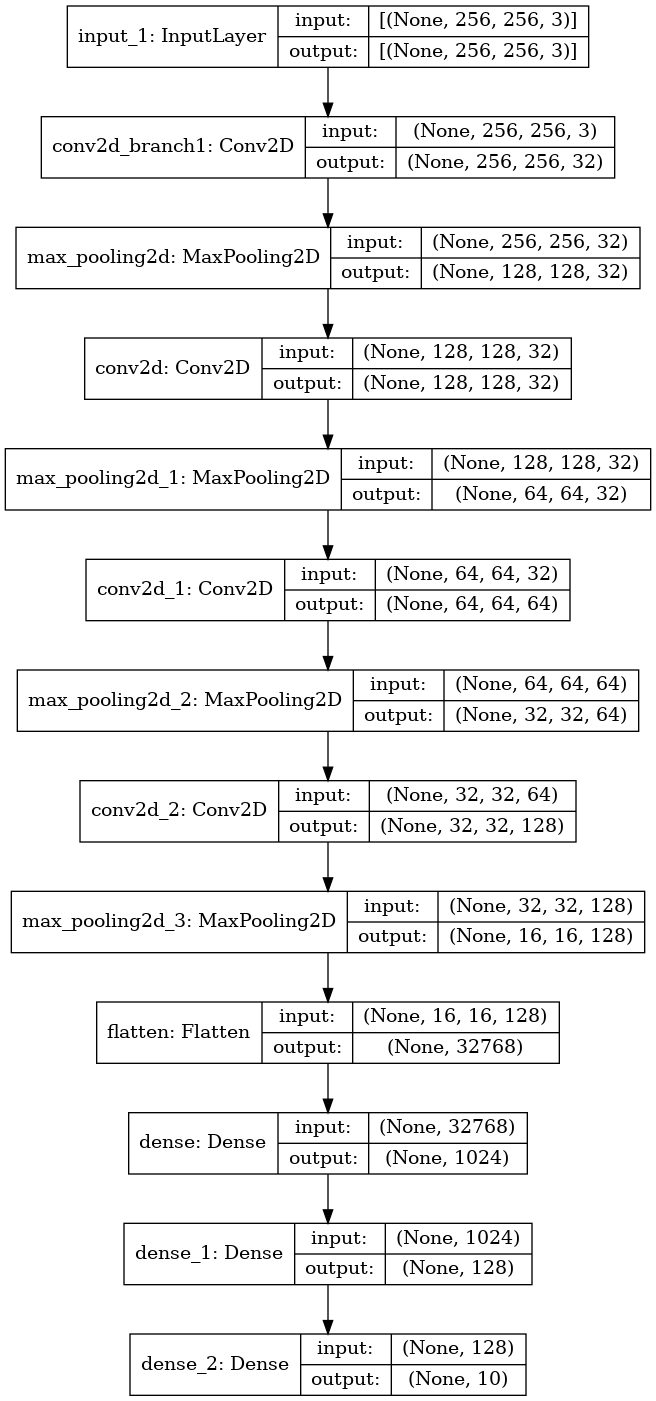

In [23]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
Image("model.png")

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_branch1 (Conv2D)      (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0     

In [25]:
lr_reduction = ReduceLROnPlateau(monitor='val_loss',patience=4, verbose=1,  factor=0.4, min_lr=0.0001)

early_stop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=8, mode='auto', restore_best_weights=True)

In [26]:
# Compile the model
model.compile(optimizer= 'adam',loss=tensorflow.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [27]:

model_fit = model.fit(train_data, epochs=epoch ,batch_size = batch_size ,validation_data=valid_data, verbose =1,callbacks=[early_stop,lr_reduction])

2022-06-30 16:28:44.535209: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-06-30 16:28:47.981865: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


147/147 [==============================] - 254s 2s/step - loss: 2.0655 - accuracy: 0.2833 - val_loss: 1.9043 - val_accuracy: 0.2992
Epoch 2/10
147/147 [==============================] - 196s 1s/step - loss: 1.8267 - accuracy: 0.3639 - val_loss: 1.7604 - val_accuracy: 0.3639
Epoch 3/10
147/147 [==============================] - 194s 1s/step - loss: 1.6924 - accuracy: 0.4092 - val_loss: 1.6588 - val_accuracy: 0.4373
Epoch 4/10
147/147 [==============================] - 193s 1s/step - loss: 1.5667 - accuracy: 0.4573 - val_loss: 1.6151 - val_accuracy: 0.4691
Epoch 5/10
147/147 [==============================] - 194s 1s/step - loss: 1.4409 - accuracy: 0.5086 - val_loss: 1.4402 - val_accuracy: 0.4923
Epoch 6/10
147/147 [==============================] - 192s 1s/step - loss: 1.2856 - accuracy: 0.5574 - val_loss: 1.2900 - val_accuracy: 0.5541
Epoch 7/10
147/147 [==============================] - 195s 1s/step - loss: 1.1362 - accuracy: 0.6089 - val_loss: 1.0822 - val_accuracy: 0.6322
Epoch 8/10

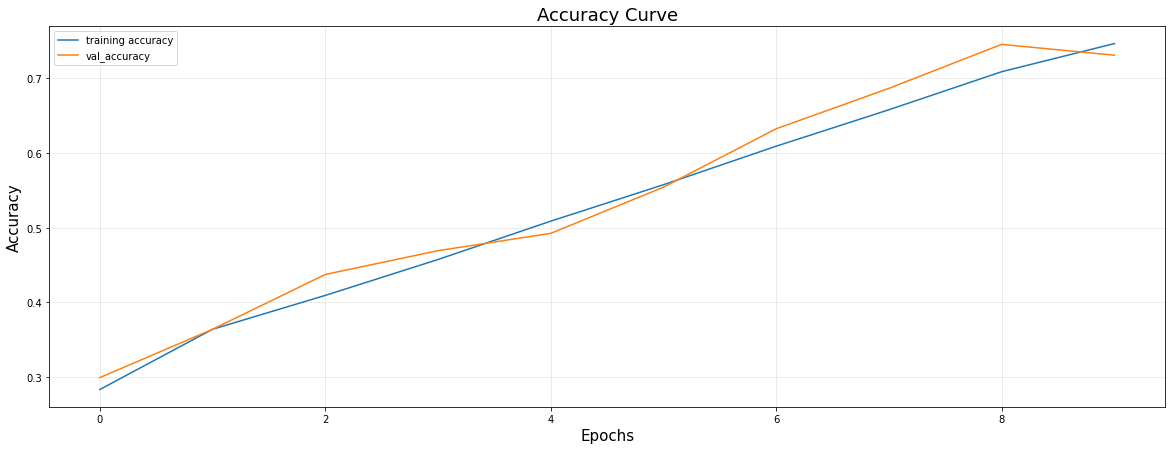

In [28]:
# Defining Figure
f = plt.figure(figsize=(20,7))

# For Accuracy
plt.plot(model_fit.epoch,model_fit.history['accuracy'],label = "training accuracy") # Accuracy curve for training set
plt.plot(model_fit.epoch,model_fit.history['val_accuracy'],label = "val_accuracy") # Accuracy curve for validation set

plt.title("Accuracy Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

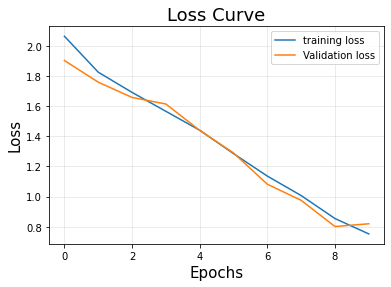

In [29]:
plt.plot(model_fit.epoch,model_fit.history['loss'],label="training loss") # Loss curve for training set
plt.plot(model_fit.epoch,model_fit.history['val_loss'],label="Validation loss") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()